# Market Basket Analysis: Apriori Algorithm
Dataset: Order2.csv<br>
This dataset comprises the list of transactions of a retail company over the
period of one week. It contains a total of 7501 transaction records where each
record consists of the list of items sold in one transaction. Using this record of
transactions and items in each transaction, find the association rules between
items.
There is no header in the dataset and the first row contains the first transaction,
so mentioned header = None here while loading dataset. Follow following
steps:
a. Data Pre-processing
b. Generate the list of transactions from the dataset
c. Train Apriori algorithm on the dataset
d. Visualize the list of rules

In [49]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset from CSV (replace 'new.csv' with your file path)
df = pd.read_csv('/Users/namanlabhsetwar/Desktop/Sem 5 Practical/ML- Lab Assignments/LP-1 Dataset/Apriori/Order2.csv', header=None)

# Convert the DataFrame to strings (assuming mixed data types)
df = df.applymap(str)

# Convert the DataFrame to the format suitable for Apriori
te = TransactionEncoder()
te_ary = te.fit(df.values).transform(df.values)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# Display the frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


Frequent Itemsets:
     support              itemsets
0   0.163845           (chocolate)
1   0.179709                (eggs)
2   0.170911        (french fries)
3   0.132116           (green tea)
4   0.129583                (milk)
5   0.238368       (mineral water)
6   0.999867                 (nan)
7   0.174110           (spaghetti)
8   0.163845      (chocolate, nan)
9   0.179709           (eggs, nan)
10  0.170911   (french fries, nan)
11  0.131982      (green tea, nan)
12  0.129583           (milk, nan)
13  0.238235  (mineral water, nan)
14  0.174110      (spaghetti, nan)

Association Rules:
       antecedents consequents  antecedent support  consequent support  \
0      (chocolate)       (nan)            0.163845            0.999867   
1           (eggs)       (nan)            0.179709            0.999867   
2   (french fries)       (nan)            0.170911            0.999867   
3      (green tea)       (nan)            0.132116            0.999867   
4           (milk)       (nan) 

In [50]:
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,chutney,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,turkey,avocado,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,mineral water,milk,energy bar,whole wheat rice,green tea,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7498,chicken,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7499,escalope,green tea,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


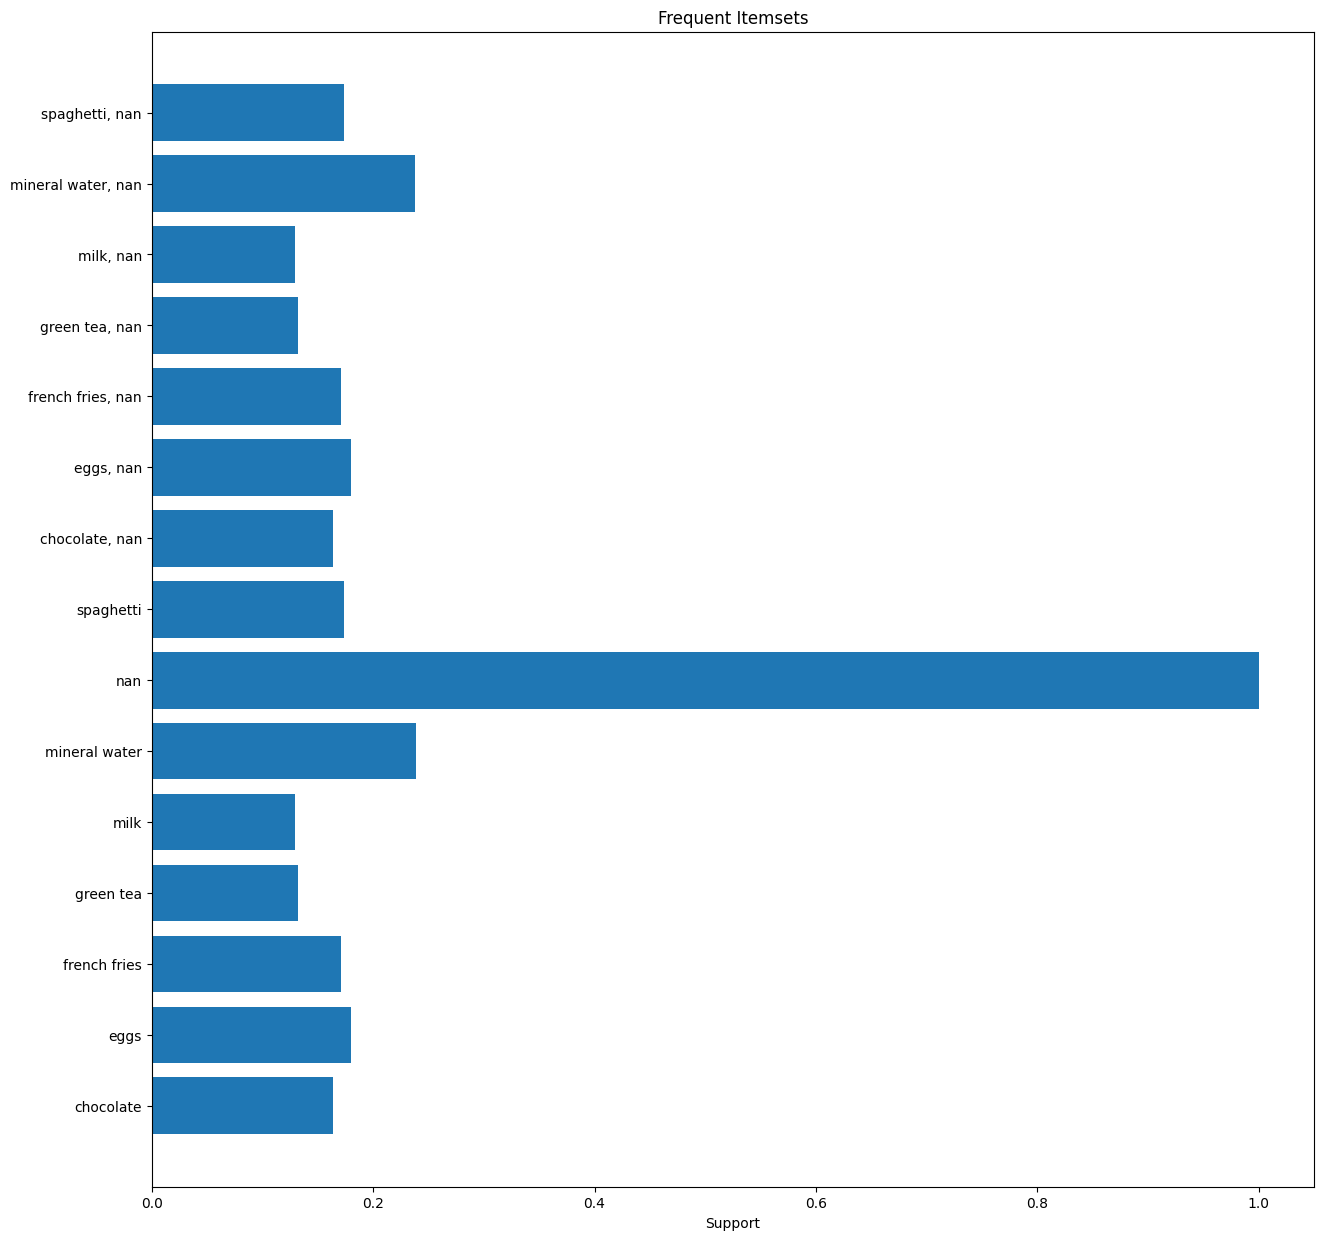

In [51]:
plt.figure(figsize=(15, 15))
plt.barh(range(len(frequent_itemsets)), frequent_itemsets['support'], align='center')
# support is the frequency of occurence of the itemset
plt.yticks(range(len(frequent_itemsets)), frequent_itemsets['itemsets'].apply(lambda x: ', '.join(x)))
plt.xlabel('Support')
plt.title('Frequent Itemsets')
plt.show()